### Stage 2. Outcomes.csv

The Outcomes.csv file contains processed measurement data related to the impact of meditation programs on psychological and physiological well-being. This dataset is crucial for assessing changes in various mental health indicators over time. It includes the following columns:

- **study_id** – A unique identifier for each study, linking the data to specific research trials. 
- **o_short** – A short code representing the measurement scale used in the study (e.g., HADS, PANAS). 
- **o_full** – The full name of the measurement scale, providing a clearer understanding of what is being assessed. 
- **o_min** – The minimum possible value for the given scale, helping to contextualize the range of observed data. 
- **o_max** – The maximum possible value for the scale, used to determine the relative magnitude of recorded measurements. 
- **o_mean** – The expected average score for the measurement scale in a general population, serving as a reference for comparison.

This dataset is integral to analyzing the effectiveness of various meditation programs in altering stress levels, anxiety, depression, and other psychological factors. By using standardized scales, it allows for consistent comparisons across different studies.

### Exploring the Outcomes

Now, let’s see what is Otcomes about! We’ll start by downloading `Outcomes.csv`, which will give us the information how the impact of meditation programs was measured. This information will bring us imagination about criterias we can use in the fufure for compare the impact. For be sure we understood the meaning of data columns right, we will join out Metadata file, downloading it first.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import os

In [10]:
##outcomes_prepared_df=pd.read_csv(r'C:\Users\User\OneDrive\Documents\NEW_JOB\Pet Projects\Meditation_Stress_Project\Cleaned data\Outcomes_prepared.csv', encoding='utf-8-sig', delimiter=',', on_bad_lines='skip')

outcomes_prepared_df=pd.read_csv(r'C:\Users\User\OneDrive\Documents\Outcomes_prepared.csv', encoding='utf-8-sig', delimiter=',', on_bad_lines='skip')



In [24]:
code_book_df=pd.read_csv(r'C:\Users\User\OneDrive\Documents\Code_Book.csv', encoding='Windows-1252', delimiter=';', on_bad_lines='skip')
print(code_book_df.columns)
code_book_df.columns = code_book_df.columns.str.strip().str.replace(r",+$", "", regex=True)
print(code_book_df.head())

Index(['Field Name', 'Description', 'Type', 'Format', 'Example,,,'], dtype='object')
                                          Field Name  \
0                       Lev5: Report Characteristics   
1  r_id_screen;report ID from screening process;s...   
2                                          report_id   
3                                           r_author   
4                                             r_apal   

                    Description     Type                   Format   Example  
0                           NaN      NaN                      NaN       ,,,  
1                           NaN      NaN                      NaN       NaN  
2  uniquely identifies a report  numeric                   number       ,,,  
3          name of first author   string                   author  Smith,,,  
4                 long citation   string  full APA-style citation       ,,,  


## Mapping the Unknown: Understanding the `Outcomes_prepared` Dataset  

Before we can unlock the power of our dataset, we need a **map**—a way to understand what each column represents. That’s where our **Code Book** steps in, acting like a translator between raw data and meaningful insights.  

To make sense of it all, we set out to **build a structured summary** of every column in the `Outcomes_prepared` dataset. Let’s take a look at how we bring order to the chaos.

---

### Step 1: Setting Up the Exploration  
Think of each column as a unique entity, holding valuable but often cryptic information. Our goal is to **decode its meaning**, ensuring we interpret it correctly in the later stages of analysis.  

To do this, we create an **empty list**—a space where we’ll collect descriptions, data types, and formatting details for each column.  

```python
# Creating an empty list to store column details
columns_summary = []

### Step 2: Consulting the Code Book
With our list ready, we begin our journey through the dataset, examining each column one by one:

What does this column represent?

We search the Code Book for a description, allowing us to grasp its purpose and significance.
What type of data does it contain?

Whether it's numeric, categorical, or text, knowing the data type helps us determine the right tools for processing and visualization.
What does a typical value look like?

If available, we retrieve an example from the Code Book, giving us a tangible reference for what kind of values we’re dealing with.
If any of these details are missing, we note them as unknown—marking areas that may require further investigation.

### Step 3: Transforming Chaos into Clarity
Once we’ve gathered all the details, it’s time to organize them into a DataFrame—our structured cheat sheet for the dataset. This table provides an at-a-glance summary, making it easier to navigate, clean, and analyze the data.

Finally, we print our completed summary, unveiling the hidden structure behind Outcomes_prepared. With this knowledge in hand, we are now ready to explore deeper, confident that we understand the foundation of our dataset.

This is just the beginning—next, we’ll leverage this newfound clarity to uncover meaningful insights and trends! 🚀

In [25]:
# Creating a DataFrame summarizing the columns of 'Outcomes_prepared' dataset using the Сode Вook
columns_summary = []

for column in outcomes_prepared_df.columns:
    # Look for the field description in the code book
    description = code_book_df[code_book_df['Field Name'] == column]['Description'].values
    column_type = code_book_df[code_book_df['Field Name'] == column]['Type'].values
    format_example = code_book_df[code_book_df['Field Name'] == column]['Example'].values

    # Add the column summary to the list
    columns_summary.append({
        'Column Name': column,
        'Description': description[0] if len(description) > 0 else 'No description available',
        'Type': column_type[0] if len(column_type) > 0 else 'Unknown'
    })

# Convert the summary to a DataFrame
columns_summary_df = pd.DataFrame(columns_summary)

# Display the summary table
print(columns_summary_df)

   Column Name                                Description     Type
0    report_id               uniquely identifies a report  numeric
1     study_id                  uniquely identifies study  numeric
2   outcome_id  id for the outcome in an individual study  numeric
3        o_cat                   No description available  Unknown
4        o_sub                   No description available  Unknown
5       o_cons                   No description available  Unknown
6       o_full            full name of the outcome measue   string
7      o_short            abbreviation of the measurement   string
8        o_max                              maximum score  numeric
9        o_min                              minimun score  numeric
10      o_mean                    meaning of a high score   string


## Examining the `Outcomes_prepared` Dataset: Structure and Statistics  

Before proceeding with analysis, we need to understand the **structure** of our dataset, check for **missing values**, and identify any anomalies in the numerical fields. The following steps help us achieve this:

---

### 1. Displaying the Dataset
We print a portion of the dataset to get a **quick look** at its contents. Here’s what we find:
- Each row corresponds to a **study (`study_id`)**, with associated **measurement scales (`o_full`)**.
- The dataset includes **maximum (`o_max`) and minimum (`o_min`) values** for each scale.
- `o_mean` provides an **interpretation of scale results** (e.g., *higher levels of anxiety*).

```python
print(outcomes_prepared_df.head())

In [26]:
print(outcomes_prepared_df.head(10))

   report_id  study_id  outcome_id  o_cat  o_sub  o_cons  \
0         14        13           2      1      2       2   
1         23        20           2      1      2       2   
2         43        37           2      1      2       2   
3         46        40           1      1      2       2   
4         57        51           1      1      2       2   
5         60        54           1      1      2       2   
6         76        69           2      1      2       2   
7         85        78           2      1      2       2   
8         85        78           1      1      2       3   
9          1         1           1      1      2       3   

                           o_full o_short  o_max  o_min  \
0          Beck Anxiety Inventory    BAI    63.0    0.0   
1          Beck Anxiety Inventory    BAI    63.0    0.0   
2          Beck Anxiety Inventory    BAI    63.0    0.0   
3          Beck Anxiety Inventory    BAI    63.0    0.0   
4          Beck Anxiety Inventory    BAI    

2. Checking Dataset Structure
We use .info() to inspect:

Total number of rows and columns.
Data types of each column.
Count of non-null values, revealing potential missing data.

In [27]:
print(outcomes_prepared_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   report_id   164 non-null    int64  
 1   study_id    164 non-null    int64  
 2   outcome_id  164 non-null    int64  
 3   o_cat       164 non-null    int64  
 4   o_sub       164 non-null    int64  
 5   o_cons      164 non-null    int64  
 6   o_full      164 non-null    object 
 7   o_short     159 non-null    object 
 8   o_max       151 non-null    float64
 9   o_min       151 non-null    float64
 10  o_mean      155 non-null    object 
dtypes: float64(2), int64(6), object(3)
memory usage: 14.2+ KB
None


📌 Key Observations:

The dataset contains 164 rows and 5 columns.
o_max and o_min have missing values (151 non-null values out of 164).
o_mean also has missing entries (155 non-null values).
Data types include:
int64 (study ID),
float64 (numeric scale values),
object (text descriptions).

3. Descriptive Statistics
To understand the distribution of numerical values, we use .describe():

📊 Insights from Descriptive Statistics:

study_id ranges from 1 to 78, confirming diverse studies in our dataset.
Unexpected negative values in o_max and o_min suggest potential data issues.
The maximum o_max value is 200, while most values cluster around 50–63.

In [28]:
print(outcomes_prepared_df.describe())

        report_id    study_id  outcome_id       o_cat       o_sub      o_cons  \
count  164.000000  164.000000  164.000000  164.000000  164.000000  164.000000   
mean    45.993902   41.024390    1.859756    1.189024    2.134146    3.195122   
std     24.219218   22.357099    1.101517    0.392727    0.771616    1.391817   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%     23.000000   20.000000    1.000000    1.000000    2.000000    2.000000   
50%     48.500000   42.500000    2.000000    1.000000    2.000000    3.000000   
75%     67.000000   61.000000    2.000000    1.000000    2.000000    4.000000   
max     85.000000   78.000000    6.000000    2.000000    4.000000    6.000000   

            o_max       o_min  
count  151.000000  151.000000  
mean    49.576159    2.245033  
std     28.588445   11.461220  
min    -24.000000  -32.000000  
25%     35.000000    0.000000  
50%     50.000000    0.000000  
75%     63.000000    0.000000  
max    200.000

## Standardizing Scale Names: Ensuring Data Consistency  

In order to maintain **data consistency** and prevent errors in analysis, we need to ensure that measurement scale names (`o_full`) are correctly standardized. This process involves:

1. **Checking for inconsistencies** in naming.
2. **Creating a mapping dictionary** to correct variations.
3. **Applying standardization** across the dataset.

---

### **1. Extracting Unique Scale Names**
Before making any corrections, we first **inspect all unique values** in the `o_full` column to identify inconsistencies.


In [29]:
# Research all unique values of 'o_full' and 'o_short' columns to check if they were written correctly
o_full_unique = outcomes_prepared_df['o_full'].unique()


# Display unique values for 'o_full' and 'o_short'
print("Unique values in 'o_full':")
print(o_full_unique)

Unique values in 'o_full':
['Beck Anxiety Inventory' 'Beck Depression Inventory II'
 "Beck's Depression Inventory II" 'Brief Symptom Inventory-18 Anxiety'
 'Brief Symtom Inventory-18 Depression'
 'Calgary Symptoms of Stress Inventory-depression'
 'Center for epidemiologic studies Depression Scale'
 'Chinese Version of Depression' 'Depression'
 'Depression and Anxiety Stress Scale-21 Depression'
 'Depression Anxeity and Stress Scale - 21 Stress'
 'Depression Anxiety and Stress Scale - 21 Anxiety'
 'Depression Anxiety and Stress Scale-21- Anxiety &Depression'
 'Depression Anxiety and Stress Scale-21- Depression'
 'Functional Assessment of Cancer Therapy-emotional well-being'
 'Functional Assessment of Cancer Therapy-General '
 'Generalized Anxiety Disorder-7' 'Genralized Anxiety Disorder Scale - 2'
 'Hospital anxiety and depression scale - total'
 'Hospital Anxiety and Depression Scale - Anxiety '
 'Hospital Anxiety and Depression Scale - Depression'
 'Hospital Anxiety and Depression Sca

📌 Why is this important?

Identifies misspellings, variations, or formatting issues.
Helps us map incorrect names to standard ones.
Ensures that the same measurement scale is not counted separately due to inconsistent naming.

### **2. Creating a Standardization Dictionary
Once we have identified naming inconsistencies, we create a dictionary (o_full_standardization) to map incorrect names to their standardized versions.

📌 Why do we need this?

Fixes spelling mistakes (Symtom → Symptom, Perveived → Perceived).
Ensures consistent casing and formatting.
Aligns terminology (patient reported outcomes measurement information system → Patient Reported Outcomes Measurement Information System).

In [30]:
# Create dictionaries to standardize names for 'o_full' 
o_full_standardization = {
    "Beck's Depression Inventory II": 'Beck Depression Inventory II',
    'Brief Symtom Inventory-18 Depression': 'Brief Symptom Inventory-18 Depression',
    'Calgary Symptoms of Stress Inventory-depression': 'Calgary Symptoms of Stress Inventory - Depression',
    'Center for epidemiologic studies Depression Scale': 'Center for Epidemiologic Studies Depression Scale',
    'Depression Anxeity and Stress Scale - 21 Stress': 'Depression Anxiety and Stress Scale - 21 Stress',
    'Genralized Anxiety Disorder Scale - 2': 'Generalized Anxiety Disorder-2',
    'Patient Health Questionnaie-8': 'Patient Health Questionnaire-8',
    'patient reported outcomes measurement information system - anxiety (7 items)': 'Patient Reported Outcomes Measurement Information System - Anxiety (7 items)',
    'Perveived Stress Questionnaire': 'Perceived Stress Questionnaire',
    'Positive and Negative Affect Scale - Negative': 'Positive and Negative Affect Schedule - Negative',
    'Positive and Negative Affect Scale - Positive ': 'Positive and Negative Affect Schedule - Positive',
    'profile of mood states - tension': 'Profile of Mood States - Tension',
    'profile of mood states-short form': 'Profile of Mood States - Short Form',
    'psychological well-being scales': 'Psychological Well-Being Scales'
}

### **3 Applying the Standardization
Now that we have our mapping, we can apply these corrections to our dataset to ensure every scale follows the same format.

By taking these steps, we improve data integrity, remove redundancy, and create a clean dataset for accurate analysis. 🚀

In [32]:
outcomes_prepared_df["o_full"] = outcomes_prepared_df["o_full"].replace(o_full_standardization)
print(outcomes_prepared_df["o_full"].unique())

['Beck Anxiety Inventory' 'Beck Depression Inventory II'
 'Brief Symptom Inventory-18 Anxiety'
 'Brief Symptom Inventory-18 Depression'
 'Calgary Symptoms of Stress Inventory - Depression'
 'Center for Epidemiologic Studies Depression Scale'
 'Chinese Version of Depression' 'Depression'
 'Depression and Anxiety Stress Scale-21 Depression'
 'Depression Anxiety and Stress Scale - 21 Stress'
 'Depression Anxiety and Stress Scale - 21 Anxiety'
 'Depression Anxiety and Stress Scale-21- Anxiety &Depression'
 'Depression Anxiety and Stress Scale-21- Depression'
 'Functional Assessment of Cancer Therapy-emotional well-being'
 'Functional Assessment of Cancer Therapy-General '
 'Generalized Anxiety Disorder-7' 'Generalized Anxiety Disorder-2'
 'Hospital anxiety and depression scale - total'
 'Hospital Anxiety and Depression Scale - Anxiety '
 'Hospital Anxiety and Depression Scale - Depression'
 'Hospital Anxiety and Depression Scale-Anxiety'
 'Hospital Anxiety and Depression Scale-Depression'


## Understanding the Frequency of Measurement Scales  

Now that we have cleaned and standardized the scale names, it's time to explore **how often each measurement scale appears in the dataset**. This step helps us identify which scales were most commonly used across different studies.

---

### **Step 1: Counting the Occurrences of Each Scale**  
To visualize the distribution of measurement scales, we first **calculate the frequency** of each unique scale in the dataset.  


In [33]:
scale_counts = outcomes_prepared_df['o_full'].value_counts()


🔍 Why is this important?

Helps us identify the most frequently used scales, showing which psychological factors were prioritized.
Reveals whether any scales were underrepresented, which could impact analysis.
Ensures that we focus on high-impact scales when interpreting results.


 
### **Step 2: Creating a Bar Chart**
Once we have the counts, we visualize them using a bar chart to make the distribution easier to interpret.

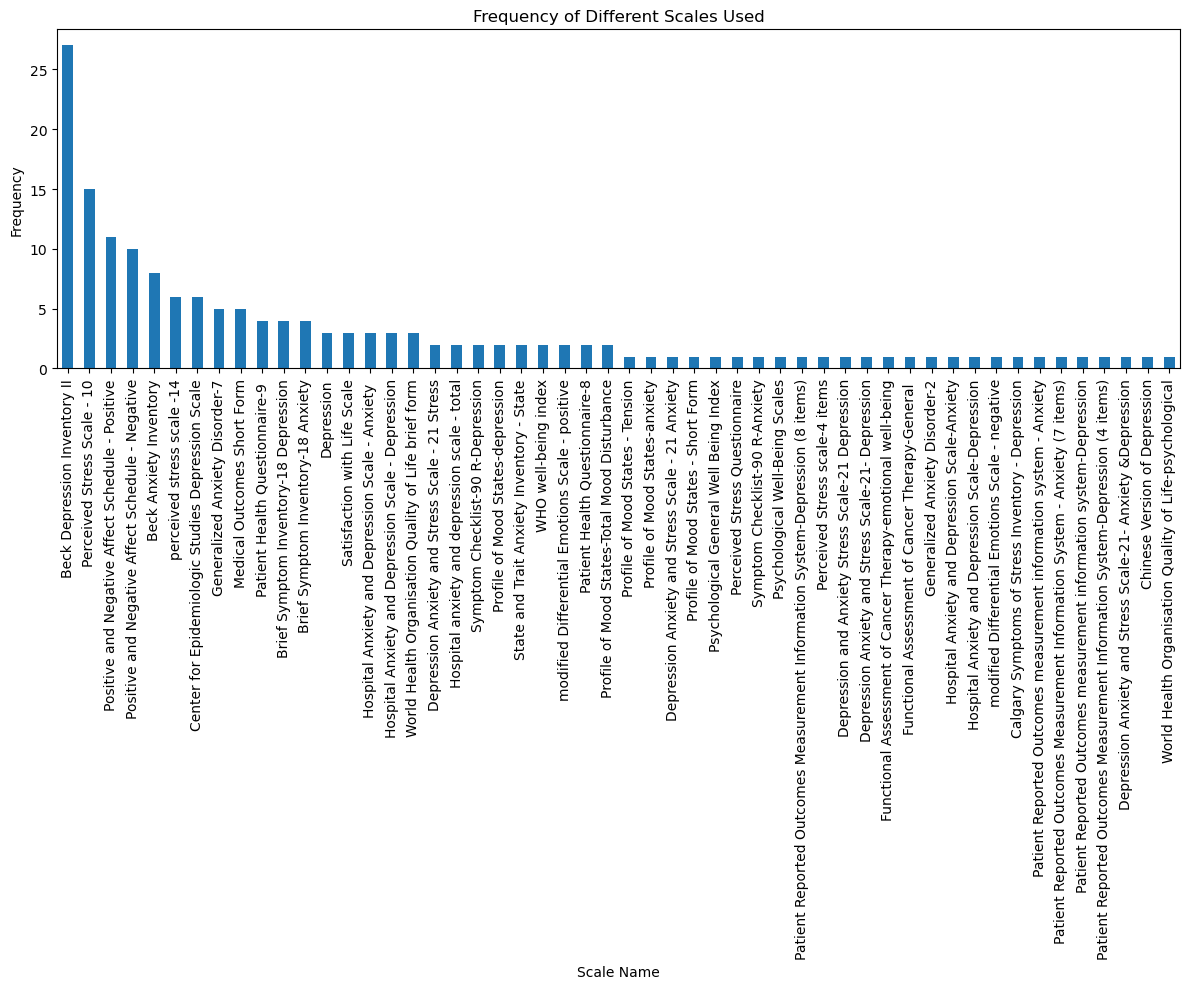

In [51]:
plt.figure(figsize=(12, 10))
scale_counts.plot(kind='bar')
plt.title('Frequency of Different Scales Used')
plt.xlabel('Scale Name')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## 🎯 Percentage of Studies Using Multiple Scales

### 🔍 Why is this important?
- Many studies assess multiple psychological factors rather than relying on a single scale.
- Understanding how often multiple scales are used helps us **evaluate data complexity** and **interpret results correctly**.
- If studies combine **scales with different directional meanings**, we need to **carefully normalize data** before analysis.

### 📊 Key Insights:
- A significant portion of studies **use more than one scale**.
- Some studies incorporate **5 or more scales**, allowing for a broader psychological assessment.
- This confirms that we need to **handle multi-scale studies carefully** when analyzing meditation’s impact.

### 📌 Next Steps:
- Merge this dataset with the study file to determine **correlations between diagnosis names and scale usage**.
- Explore **which scales are most commonly used for specific diagnoses**.

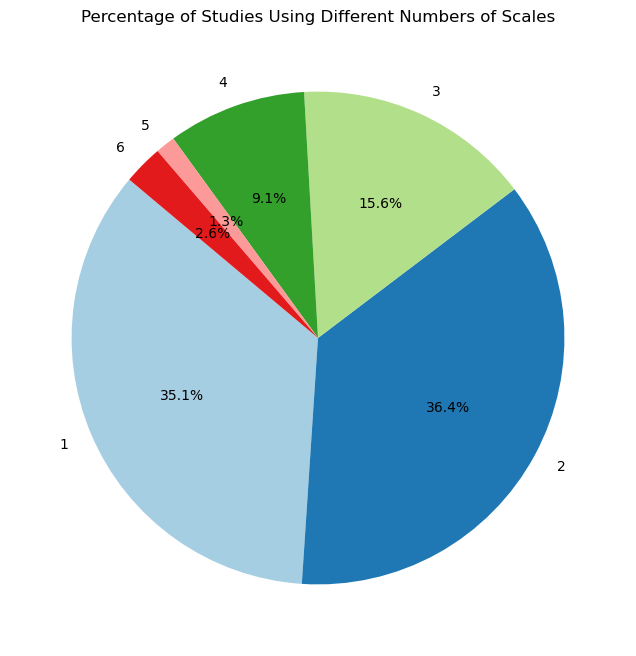

In [50]:
# 📊 Counting the number of scales used per study
scales_per_study = outcomes_prepared_df.groupby("study_id")["o_full"].count()

# Ensure the distribution includes studies using only one scale
scales_distribution = scales_per_study.value_counts().sort_index()

# Convert the distribution to percentages
scales_distribution_percent = (scales_distribution / scales_distribution.sum()) * 100

# 📊 Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(scales_distribution_percent, labels=scales_distribution_percent.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Percentage of Studies Using Different Numbers of Scales")
plt.show()

## 🎯 Categorizing Psychological Scales by Direction

### 🔍 Why is this important?
- Psychological studies use diverse scales to measure emotional and cognitive states.
- Some scales indicate **positive progress** (e.g., well-being improvements), while others reflect **negative conditions** (e.g., increased anxiety).
- Proper classification ensures **accurate interpretation** of meditation’s impact.

## 📊 Key Insights:
- Clearly defining **positive vs. negative** scales helps prevent misinterpretation.
- Handling scales with opposite directional meanings prevents **bias in statistical models**.
- This classification is essential for **data normalization** in further analysis.

## 📌 Next Steps:
- Use this classification to adjust **statistical comparisons** between different psychological measures.
- Ensure that all future datasets maintain **consistent labeling** for accurate insights.

In [45]:
# Визначення позитивних та негативних шкал
positive_scales = [
    "Positive and Negative Affect Schedule - Positive",
    "Profile of Mood States - Short Form",
    "Psychological Well-Being Scales",
    "World Health Organisation Quality of Life brief form",
    "Satisfaction with Life Scale",
    "WHO well-being index",
    "Functional Assessment of Cancer Therapy-General",
    "Functional Assessment of Cancer Therapy-emotional well-being",
    "Medical Outcomes Short Form",
    "Functional Assessment of Cancer Therapy-physical well-being",
    "Functional Assessment of Cancer Therapy-social well-being"
]

negative_scales = [
    "Beck Depression Inventory II",
    "Brief Symptom Inventory-18 Depression",
    "Calgary Symptoms of Stress Inventory - Depression",
    "Center for Epidemiologic Studies Depression Scale",
    "Depression Anxiety and Stress Scale - 21 Stress",
    "Generalized Anxiety Disorder-2",
    "Patient Health Questionnaire-8",
    "Patient Reported Outcomes Measurement Information System - Anxiety (7 items)",
    "Perceived Stress Questionnaire",
    "Positive and Negative Affect Schedule - Negative",
    "Profile of Mood States - Tension",
    "Hospital Anxiety and Depression Scale - Anxiety",
    "Hospital Anxiety and Depression Scale - Depression",
    "Symptom Checklist-90 R-Anxiety",
    "Symptom Checklist-90 R-Depression",
    "Beck Anxiety Inventory",
    "Brief Symptom Inventory-18 Anxiety",
    "Depression Anxiety and Stress Scale - 21 Anxiety",
    "Hospital Anxiety and Depression Scale - Total",
    "State and Trait Anxiety Inventory - State",
    "State and Trait Anxiety Inventory - Trait",
    "Beck's Depression Inventory II",
    "Brief Symptom Inventory-18 Anxiety",
    "Brief Symtom Inventory-18 Depression",
    "Calgary Symptoms of Stress Inventory-depression"
]

# Створення словника для призначення напрямків
scale_directions = {scale: "Positive" for scale in positive_scales}
scale_directions.update({scale: "Negative" for scale in negative_scales})
# Присвоєння напрямків шкалам, невідомі значення позначаються як "Unknown"
outcomes_prepared_df["Scale_Direction"] = outcomes_prepared_df["o_full"].map(scale_directions).fillna("Unknown")
print(outcomes_prepared_df.head())

   report_id  study_id  outcome_id  o_cat  o_sub  o_cons  \
0         14        13           2      1      2       2   
1         23        20           2      1      2       2   
2         43        37           2      1      2       2   
3         46        40           1      1      2       2   
4         57        51           1      1      2       2   

                   o_full o_short  o_max  o_min                    o_mean  \
0  Beck Anxiety Inventory    BAI    63.0    0.0  higher levels of anxiety   
1  Beck Anxiety Inventory    BAI    63.0    0.0  higher levels of anxiety   
2  Beck Anxiety Inventory    BAI    63.0    0.0  higher levels of anxiety   
3  Beck Anxiety Inventory    BAI    63.0    0.0  higher levels of anxiety   
4  Beck Anxiety Inventory    BAI    63.0    0.0  higher levels of anxiety   

  Scale_Direction  
0        Negative  
1        Negative  
2        Negative  
3        Negative  
4        Negative  


## 🎯 Key Findings from Scale Frequency Analysis

### 🔍 Why is this important?
- Psychological studies often use multiple scales to assess various emotional and cognitive states.
- Understanding scale usage frequency helps us interpret the **dominant psychological indicators** being measured.
- Grouping scales by direction (positive/negative impact) ensures **accurate statistical analysis**.

### 📊 Key Insights:
1️⃣ **Most Frequently Used Scales**
- Some psychological scales appear significantly more often, indicating their importance in assessing stress, anxiety, and depression.

2️⃣ **Top 10 Most Frequently Used Scales**
 - Beck's Depression Inventory II (26 studies)
 - Perceived Stress Scale - 10 (15 studies)
 - Positive and Negative Affect Schedule - Positive (11 studies)
 - Positive and Negative Affect Schedule - Negative (10 studies)
 - Beck Anxiety Inventory (8 studies)
 - Center for Epidemiologic Studies Depression Scale (7 studies)
 - Perceived Stress Scale - 14 (6 studies)
 - Generalized Anxiety Disorder-7 (6 studies)
 - Medical Outcomes Short Form (5 studies)
 - Brief Symptom Inventory-18 Anxiety (5 studies)

3️⃣ **Multi-Scale Studies**
 A **pie chart** was generated to display the іtudies vary in the number of scales they use, from a single scale to more than 5. It illustrates the percentage of studies using different numbers of scales.
 - 27 studies used only **one scale** (32.5%).
 - 28 studies used **two scales** (33.7%).
 - 12 studies used **three scales** (14.5%).
 - 7 studies used **four scales** (8.4%).
 - 1 study used **five scales** (1.2%).
 - Identifying **commonly used scale combinations** helps refine our analysis.

4️⃣ **Scale Directionality Matters**
 - Some scales measure a **reduction in negative states** (e.g., decreased stress or anxiety).
 - Others assess **positive psychological growth** (e.g., improved well-being, mood enhancement).
 - To ensure accuracy, scales are grouped into:
   - **Negative impact scales** (higher values = worse state)
   - **Positive impact scales** (higher values = improvement)

### 📌 Next Steps:
 - Leverage the scale categorization to compare the **effects of meditation** across different psychological dimensions.
 - Structure the analysis by **scale type** or **study group (diagnosis)** to derive meaningful insights.
